# The  four main assumptions of simple linear regression


#### Linearity: Each predictor variable (Xi) is linearly related to the outcome variable (Y).

#### Normality: The errors are normally distributed.

#### Independent Observations: Each observation in the dataset is independent.

#### Homoscedasticity: The variance of the errors is constant or similar across the model



# Linearity


In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the full penguins dataset
penguins = sns.load_dataset("penguins")

In [18]:
# Filter for Chinstrap species
chinstrap_penguins = penguins[penguins["species"] == "Chinstrap"]

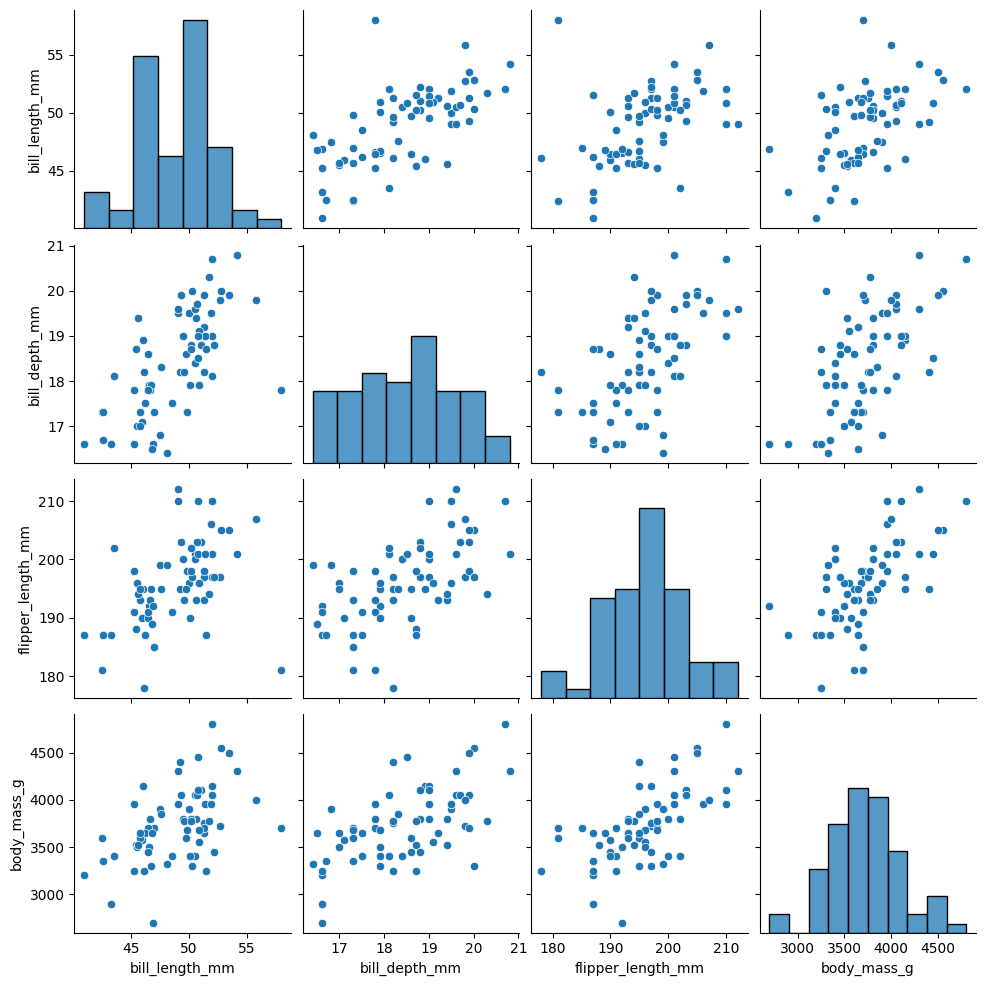

In [19]:
sns.pairplot(chinstrap_penguins)

plt.show()


# Simple linear regression 

In [20]:
# Load dataset
penguins = sns.load_dataset("penguins")


penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


## Data cleaning 

In [21]:
# Keep Adelie and Gentoo penguins, drop missing values
penguins_sub = penguins[penguins["species"] != "Chinstrap"]
penguins_final = penguins_sub.dropna()
penguins_final.reset_index(inplace=True, drop=True)

## Exploratory data analysis

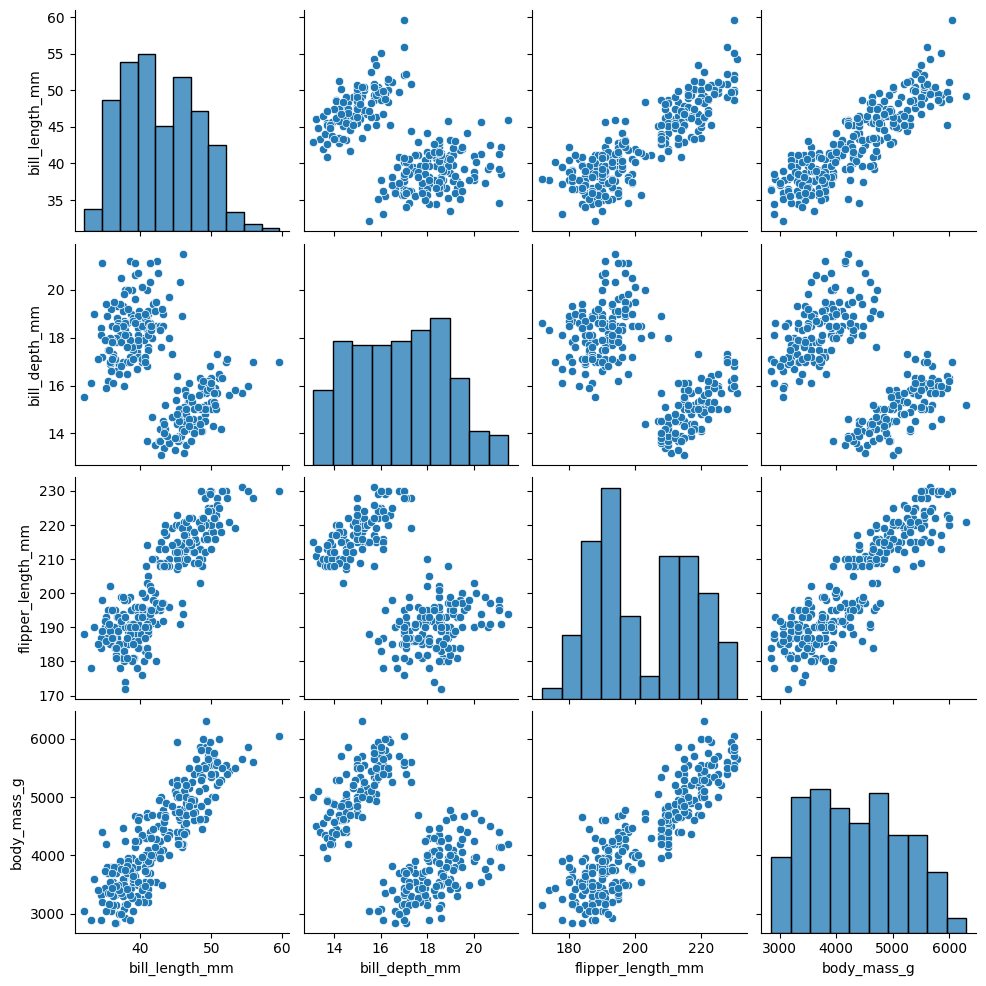

In [ ]:
# Create pairwise scatterplots of data set
sns.pairplot(penguins_final)

* bill length (mm) and flipper length (mm)
* bill length (mm) and body mass (g)
* flipper length (mm) and body mass (g)

## Model construction



In [23]:
# Subset Data
ols_data = penguins_final[["bill_length_mm", "body_mass_g"]]

In [24]:
# Write out formula
ols_formula = "body_mass_g ~ bill_length_mm"

In [25]:
# Import ols function
from statsmodels.formula.api import ols

In [26]:
# Build OLS, fit model to data
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     874.3
Date:                Wed, 06 Aug 2025   Prob (F-statistic):           1.33e-85
Time:                        09:28:36   Log-Likelihood:                -1965.8
No. Observations:                 265   AIC:                             3936.
Df Residuals:                     263   BIC:                             3943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1707.2919    205.640     -8.302      0.000   -2112.202   -1302.382
bill_length_mm   141.1904      4.775     29.569      0.000     131.788     150.592
==============================================================================
Omnibus:                        2.060   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.357   Jarque-Bera (JB):                2.103
Skew:                           0.210   Prob(JB):                        0.349
Kurtosis:                       2.882   Cond. No.                         357.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

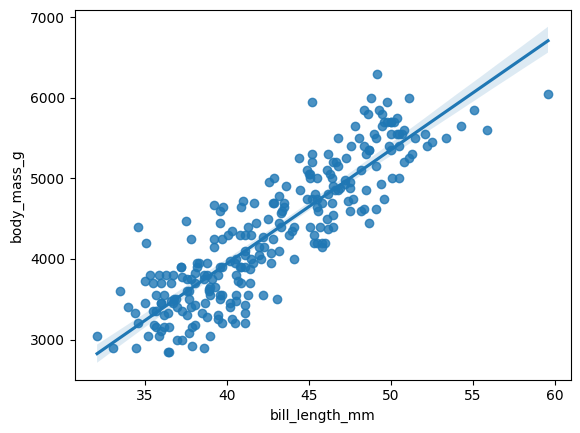

In [28]:
sns.regplot(x = "bill_length_mm", y = "body_mass_g", data = ols_data)

# Normality assumption

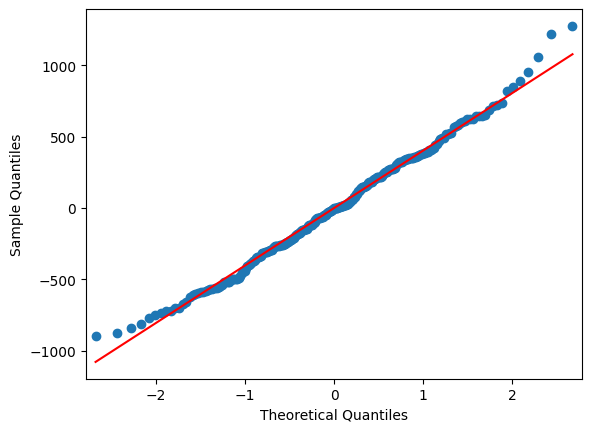

In [30]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()